In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../Dataset/collegePlace.csv')

In [3]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

C:\Users\ELCOT\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


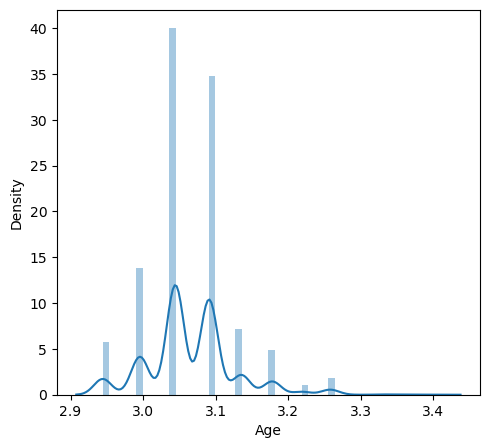

In [6]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    
transformationplot(np.log(df['Age']))


In [7]:
df=df.replace(['Male'],[0])
df=df.replace(['Female'],[1])
df=df.replace(['Computer Science', 'Information Technology', 'Electronics And Communication', 'Mechanical','Electrical','Civil'],[0,1,2,3,4,5])
df=df.drop(['Hostel'], axis=1)
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


C:\Users\ELCOT\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

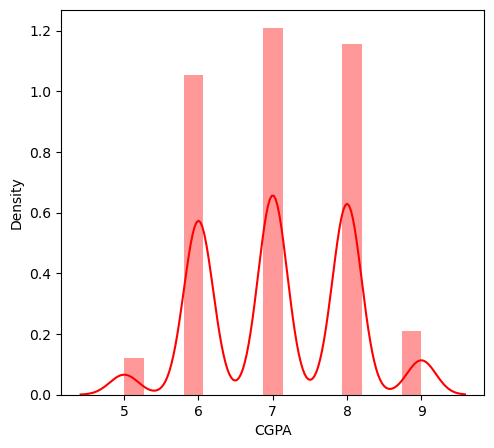

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'], color='r')


C:\Users\ELCOT\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PlacedOrNot', ylabel='Density'>

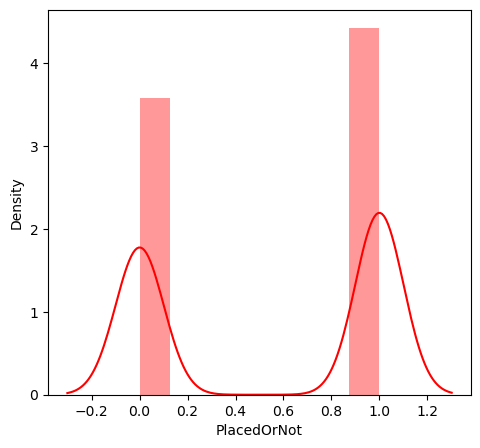

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'], color='r')


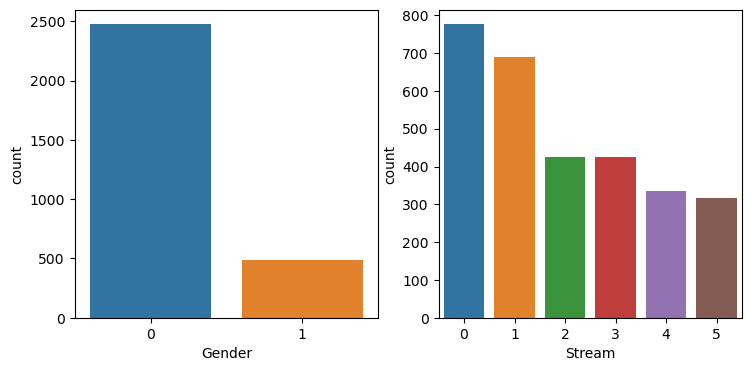

In [10]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x='Gender', data=df)
plt.subplot(1,4,2)
sns.countplot(x='Stream', data=df)
plt.show()


<AxesSubplot:xlabel='PlacedOrNot', ylabel='count'>

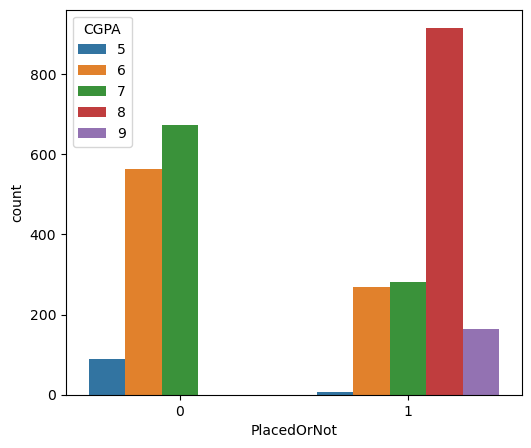

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x='PlacedOrNot', hue='CGPA', data=df)


C:\Users\ELCOT\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ELCOT\anaconda3.0\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ELCOT\anaconda3.0\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='PlacedOrNot', ylabel='CGPA'>

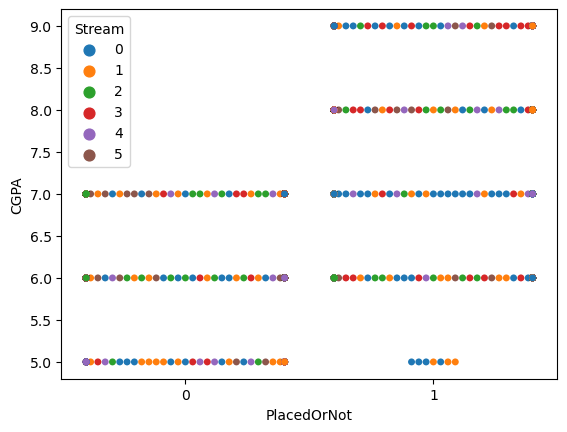

In [12]:
sns.swarmplot(df['PlacedOrNot'],df['CGPA'],hue=df['Stream'])


In [13]:
# Feature scaling
sc = StandardScaler()
X = sc.fit_transform(df.drop(['PlacedOrNot'], axis=1))
y = df['PlacedOrNot']


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [15]:
# SVM model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of the SVM model: ', svm_accuracy)


Accuracy score of the SVM model:  0.7794612794612794


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

best_k = {"Regular":0}
best_score = {"Regular":0}

for k in range(3, 50, 2):
    #using Regular training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)  #instantiate the model
    knn_temp.fit(X_train, y_train) #Fit the model to the training set
    knn_temp_pred = knn_temp.predict(X_test) #Predict on the test set
    score = metrics.accuracy_score(y_test, knn_temp_pred)*100 #Get accuracy
    if score >= best_score["Regular"] and score < 100: #store best params
        best_score["Regular"] = score
        best_k["Regular"] = k
        
print("---Results---\nK: {}\nscore: {}".format(best_k,best_score))

##instantiate the models
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])

##Fit the model to the traning set
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
testd = metrics.accuracy_score(knn_pred, y_test)
print('Accuracy score of the KNN model: ', testd)


C:\Users\ELCOT\anaconda3.0\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ELCOT\anaconda3.0\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

---Results---
K: {'Regular': 7}
score: {'Regular': 86.19528619528619}
Accuracy score of the KNN model:  0.8619528619528619


C:\Users\ELCOT\anaconda3.0\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
knn_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# Load dataset
df = pd.read_csv('../Dataset/collegePlace.csv')

# Split into training and testing sets
x = df.drop('PlacedOrNot', axis='columns')
x = x.drop('Hostel', axis='columns')
y = df['PlacedOrNot']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Preprocess data
le = preprocessing.LabelEncoder()
le.fit(X_train['Gender'])
X_train['Gender'] = le.transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])
le.fit(X_train['Stream'])
X_train['Stream'] = le.transform(X_train['Stream'])
X_test['Stream'] = le.transform(X_test['Stream'])

# Train model
classify = KNeighborsClassifier(n_neighbors=5)
classify.fit(X_train, y_train)

# Save model
with open('../Flask/rdf.pkl', 'wb') as f:
    pickle.dump(classify, f)

# Load model and make prediction
with open('../Flask/rdf.pkl', 'rb') as f:
    model = pickle.load(f)
    
# Make prediction
prediction = model.predict([[1, 1, 1, 0, 0, 1]])
print(prediction)


[0]


C:\Users\ELCOT\anaconda3.0\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ELCOT\anaconda3.0\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
